#**Derive New Input Variables**



Often, the input features for a predictive modeling task interact in unexpected and often
non-linear ways. These interactions can be identified and modeled by a learning algorithm.

Another approach is to engineer new features that expose these interactions and see if they
improve model performance. Additionally, transforms like raising input variables to a power
can help to better expose the important relationships between input variables and the target
variable.


In this tutorial, you will learn:

* Some machine learning algorithms prefer or perform better with polynomial input features.
* How to use the polynomial features transform to create new versions of input variables for
predictive modeling.
* How the degree of the polynomial impacts the number of input features created by the
transform.

Apdated from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

##Polynomial Features

Polynomial features are those features created by raising existing features to an exponent. For
example, if a dataset had one input feature X, then a polynomial feature would be the addition
of a new feature (column) where values were calculated by squaring the values in X, e.g. $X^2$.
This process can be repeated for each input variable in the dataset, creating a transformed
version of each. As such, polynomial features are a type of feature engineering, e.g. the creation
of new input features based on the existing features. The degree of the polynomial is used to
control the number of features added, e.g. a degree of 3 will add two new variables for each
input variable. Typically a small degree is used such as 2 or 3.

It is also common to add new variables that represent the interaction between features, e.g. 
a new column that represents one variable multiplied by another. This too can be repeated
for each input variable creating a new interaction variable for each pair of input variables. A
squared or cubed version of an input variable will change the probability distribution, separating
the small and large values, a separation that is increased with the size of the exponent.

This separation can help some machine learning algorithms make better predictions and is
common for regression predictive modeling tasks and generally tasks that have numerical input
variables. Typically linear algorithms, such as linear regression and logistic regression, respond
well to the use of polynomial input variables.

##Polynomial Feature Transform
The polynomial features transform is available in the scikit-learn Python machine learning
library via the **PolynomialFeatures** class.

It generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [1]:
# demonstrate the types of polynomial features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2,3],[2,3],[2,3]])
print(data)
# perform a polynomial features transform of the dataset
# generate polynomial and interaction features.
# 'degree' specifies the maximal degree of the polynomial features
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


Running the example first reports the raw data with two features (columns) and each feature
has the same value, either 2 or 3. Then the polynomial features are created, resulting in six
features, matching what was described above.

The *degree* argument controls the number of features created and defaults to 2. The
*interaction_only* argument means that only the raw values (degree 1) and the interaction
(pairs of values multiplied with each other) are included, defaulting to False. The *include_bias*
argument defaults to True to include the bias feature.

##Sonar Dataset
The sonar dataset is a standard machine learning dataset for binary classification. It involves
60 real-valued inputs and a two-class target variable. The data set contains
bouncing sonar
signals off a metal cylinder or rocks obtained from a variety of different aspect angles. Each number
represents the energy within a particular frequency band, integrated over
a certain period of time. There are 208 examples in the dataset
and the classes are reasonably balanced. The dataset describes sonar returns of rocks or simulated mines. You can learn more
about the dataset from here:
* Sonar Dataset ([sonar.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv))
* Sonar Dataset Description ([sonar.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names))

###Download Sonar data files

In [2]:
!pip install wget
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv" -o sonar.csv
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names" -o sonar.names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=414eda430f6a9f75fd9916e9fc4d094f18a69338498795b7259f3323380cb575
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under sonar.csv

Saved under sonar.names


###Summarizing the variables from the sonar dataset

In [3]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
print(dataset.head())
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())


       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

This confirms the 60
input variables, one output variable, and 208 rows of data. A statistical summary of the input
variables is provided showing that values are numeric and range approximately from 0 to 1.

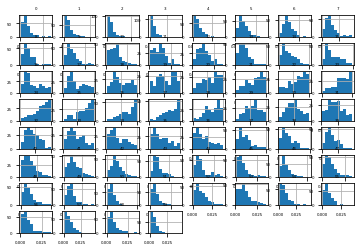

In [4]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Finally a histogram is created for each input variable. If we ignore the clutter of the plots and
focus on the histograms themselves, we can see that many variables have a skewed distribution.
The dataset provides a good candidate for using a quantile transform to make the variables
more-Gaussian.

Next, let's fit and evaluate a machine learning model on the raw dataset. We will use
a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated
stratified k-fold cross-validation.

In [5]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
# KFold 
#   is a cross-validator that divides the dataset into k folds.
# Stratified
#   is to ensure that each fold of dataset has the same proportion of observations with a given label.
# Repeated 
#   provides a way to improve the estimated performance of a machine learning model. 
# This involves simply repeating the cross-validation procedure multiple times and reporting the mean 
# result across all folds from all runs. This mean result is expected to be a more accurate estimate 
# of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
# n_neighbors : int, default=5
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In this case we can see that the model achieved a mean classification accuracy of about 79.7
percent.

##Polynomial Feature Transform
We can apply the polynomial features transform to the Sonar dataset directly. In this case, we
will use a degree of 3.

In [6]:
# visualize a polynomial features transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)

(208, 39711)


We
can see that our features increased from 61 (60 input features) for the raw dataset to 39,711
features (39,710 input features).

Next, let's evaluate the same KNN model as the previous section, but in this case on a
polynomial features transform of the dataset.

In [7]:
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


we can see that the polynomial features transform results in a lift in
performance from 79.7 percent accuracy without the transform to about 80.0 percent with the
transform.

##Effect of Polynomial Degree
The degree of the polynomial dramatically increases the number of input features. To get an
idea of how much this impacts the number of features, we can perform the transform with a
range of different degrees and compare the number of features in the dataset.

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376


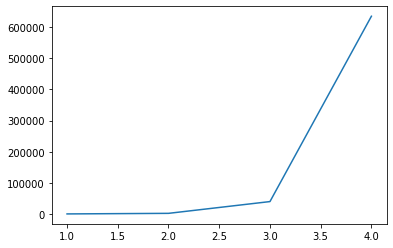

In [8]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
  # load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
  
# define dataset
X, y = get_dataset('sonar.csv')
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 5)]
for d in degress:
  # create transform
  trans = PolynomialFeatures(degree=d)
  # fit and transform
  data = trans.fit_transform(X)
  # record number of features
  num_features.append(data.shape[1])
  # summarize
  print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

We can see that a degree of 1 has no effect and that the number of features dramatically
increases from 2 through to 4. This highlights that for anything other than very small datasets,
a degree of 2 or 3 should be used to avoid a dramatic increase in input variables.

More features may result in more overfitting, and in turn, worse results. It may be a good
idea to treat the degree for the polynomial features transform as a hyperparameter and test
different values for your dataset. The example below explores degree values from 1 to 4 and
evaluates their effect on classification accuracy with the chosen model.

In [9]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# get the dataset
def get_dataset(filename):
  # load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for d in range(1,5):
  # define the pipeline
    trans = PolynomialFeatures(degree=d)
    model = KNeighborsClassifier()
    models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
  
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset('sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


we can see that performance is generally worse than no transform (degree
1) except for a degree 3. It might be interesting to explore scaling the data before or after
performing the transform to see how it impacts model performance.

Box and whisker plots can be created to summarize the classification accuracy scores for each
polynomial degree.

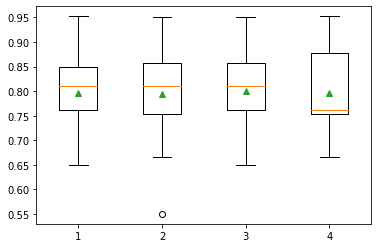

In [11]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see that performance remains 
flat, perhaps with the first signs of
overfitting with a degree of 4.